In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/mnist_train.csv.zip")
df1 = pd.read_csv("/content/mnist_test.csv.zip")

In [ ]:
df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.shape[0])
print(df1.shape[0])

60000
10000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
df.isnull().sum()

,0
label,0
1x1,0
1x2,0
1x3,0
1x4,0
...,...
28x24,0
28x25,0
28x26,0
28x27,0


In [ ]:
df["label"].value_counts().sort_index()

,count
label,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


In [ ]:
df1["label"].value_counts().sort_index()

,count
label,
0,980
1,1135
2,1032
3,1010
4,982
5,892
6,958
7,1028
8,974


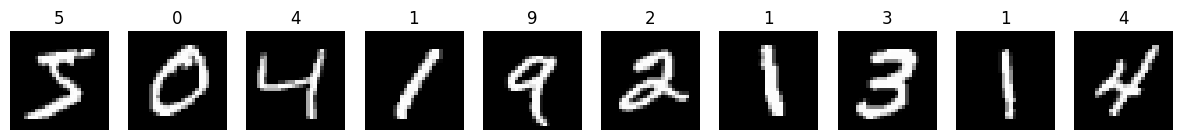

In [ ]:
samples = df.head(10)

plt.figure(figsize=(15, 4))

for i, (_, row) in enumerate(samples.iterrows(), 1):
    label = row["label"]
    pixels = row[1:].to_numpy().astype(np.float32)
    image = pixels.reshape(28, 28)

    plt.subplot(1, 10, i)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    plt.axis("off")

plt.show()

In [ ]:
print(df["label"].head())
print(df["label"].dtype)
print(df["label"].unique()[:10])


0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64
int64
[5 0 4 1 9 2 3 6 7 8]


In [ ]:
x = df.drop("label", axis = 1)
y = df["label"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
x_train = df.drop(columns=["label"]).astype("float32")
y_train = df["label"].astype("int64")

x_test = df1.drop(columns=["label"]).astype("float32")
y_test = df1["label"].astype("int64")


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
print("y_train dtype:", y_train.dtype)
print("Unique labels:", set(y_train[:10]))


y_train dtype: int64
Unique labels: {0, 1, 2, 3, 4, 5, 9}


In [ ]:
print("Original :", x_train.shape)
print("Reduced :", x_train_pca.shape)

Original : (60000, 784)
Reduced : (60000, 100)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test_pca)

In [ ]:
accuracy_score(y_test, y_pred)

0.9727

In [ ]:
cm = confusion_matrix(y_test, y_pred)

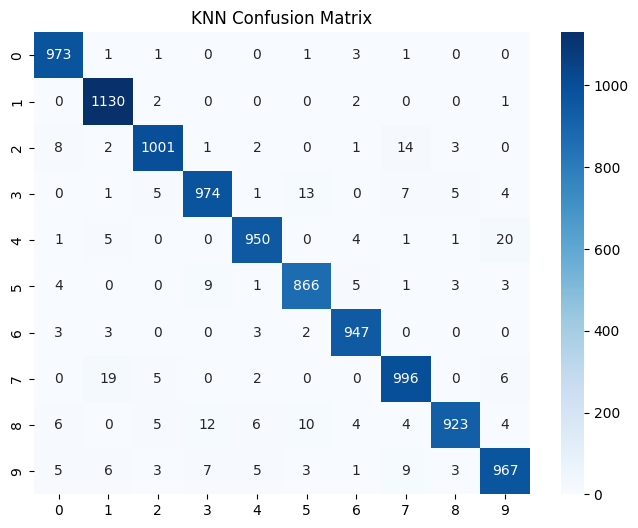

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
svm = SVC(kernel='rbf', C=5, gamma=0.02)
svm.fit(x_train_pca, y_train)

SVC(C=5, gamma=0.02)

In [ ]:
y_pred_svm = svm.predict(x_test_pca)

In [ ]:
accuracy_score(y_test, y_pred_svm)

0.9855

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

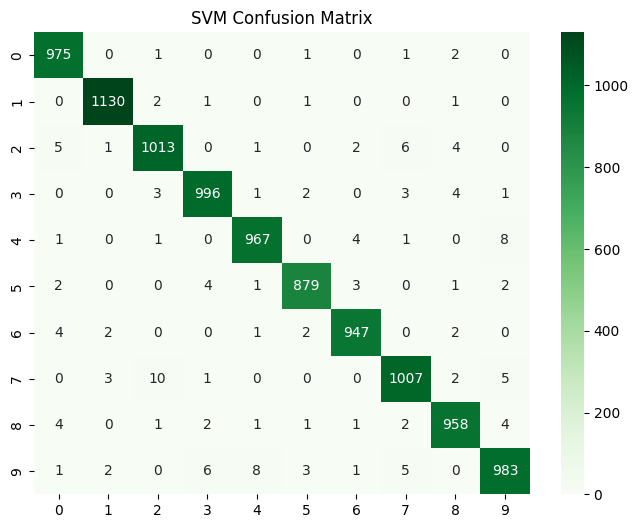

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt.fit(x_train_pca, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=10)

In [ ]:
y_pred_dt = dt.predict(x_test_pca)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.8427

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

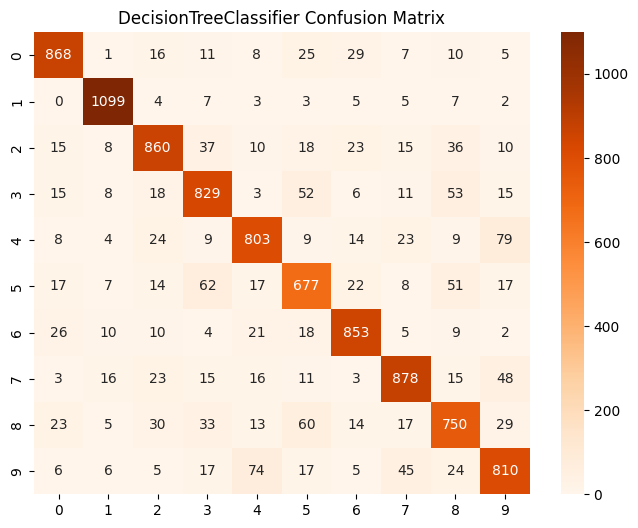

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("DecisionTreeClassifier Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


KNN Accuracy: 0.9727
SVM Accuracy: 0.9855
Decision Tree Accuracy: 0.8427


In [ ]:
misclassified_idx = np.where(y_test != y_pred_svm)[0]

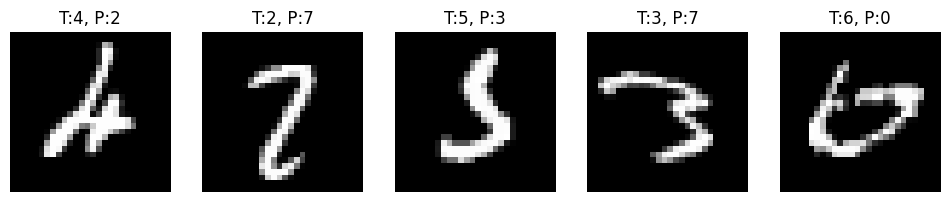

In [ ]:
X_test_np = x_test.to_numpy()

plt.figure(figsize=(12,4))

for i, idx in enumerate(misclassified_idx[:5]):
    image = X_test_np[idx].reshape(28,28)
    true_label = y_test[idx]
    pred_label = y_pred_svm[idx]

    plt.subplot(1,5,i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"T:{true_label}, P:{pred_label}")
    plt.axis("off")

plt.show()


** Three classical ML models : K-NearestNeighbors(KNN), Support Vector MAchine(SVM), and Decision Tree are comparing for handwritten digit classification. In these models, SVM achieved the highest accuracy, then KNN. While the Decision Tree performed worse. The SVM performs well because decision boundaries that separate classes. It chooses the one with the largest margin the larger the margin the better the generalization and after applying feature scaling and PCA. KNN also performs quite well but sensitive towards noisy data due to its distance-based nature. And Decision Tree is going for overfit in training data, because it tried to evaluate 784 features and each split only uses one pixel.**

# Q. What is Voting Classifier?

**It is an ensemble method combines multiple models to make single prediction.**

# Q2. What is Hard voting?
**Different models predicts after that the model gets the highest votes is final prediction**

In [ ]:
from sklearn.ensemble import VotingClassifier

 VotingClassifier.fit() trains all base models, sequentially, and all three models SVM takes the longest time because of its kernal['rbf'] it takes O(n² – n³) time the heavy the data the slower it becomes to process.

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('dt', dt)],
    voting='hard')

voting_clf.fit(x_train, y_train)

In [ ]:
y_pred = voting_clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)